# Goeduhub Technologies - ML Training - Task 7
## Registration ID: GO_STP_939 
## Name: Manoj Kannan D
#### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Question: Prediction using Supervised Machine Learning using Simple Linear Regression
### In this task we have to find the students scores based on their study hours. This is a simple Regression problem type because it has only two variables. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Load Dataset

In [2]:
df = pd.read_csv('Datasets/StudentHoursScores.csv')
df.head()

,Hours,Scores
0,7.7,79
1,5.9,60
2,4.5,45
3,3.3,33
4,1.1,12


### Exploring Dataset

In [3]:
# dimensions of the dataset
df.ndim

2

In [4]:
# shape of the dataset
df.shape

(23, 2)

In [5]:
# size of the dataset (total umber of elements)
df.size

46

In [6]:
# columns present in our dataset
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [7]:
# datatypes of the each column
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [8]:
# Print a concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   23 non-null     float64
 1   Scores  23 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 496.0 bytes


In [9]:
# provides statistical analysis only in numerrical columns
df.describe()

,Hours,Scores
count,23.000000,23.000000
mean,4.817391,47.695652
std,2.709688,27.103228
min,1.100000,12.000000
25%,2.650000,27.000000
50%,4.100000,40.000000
75%,7.100000,72.500000
max,9.600000,96.000000


In [10]:
# check for null elements
df.isna().sum()

Hours     0
Scores    0
dtype: int64

### Visualizing Input Data

Text(0, 0.5, 'No. of Students')

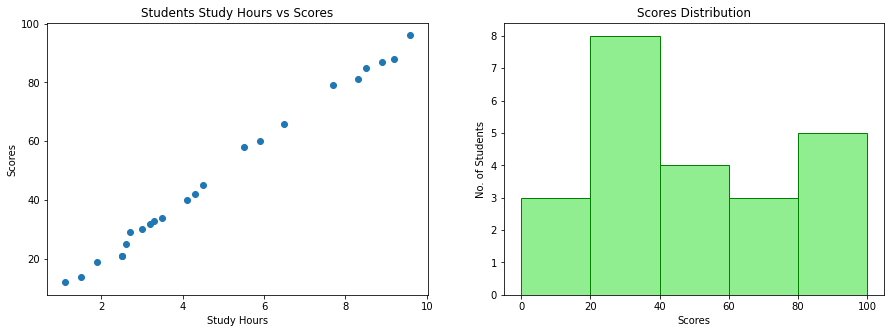

In [11]:
fig1 = plt.figure(figsize=(15,5))

ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2)

ax1.scatter(df['Hours'],df['Scores'])
ax1.set_title('Students Study Hours vs Scores')
ax1.set_xlabel('Study Hours')
ax1.set_ylabel('Scores')

ax2.hist(df['Scores'],bins=[0,20,40,60,80,100],color= 'lightgreen',edgecolor='g')
ax2.set_title('Scores Distribution')
ax2.set_xlabel('Scores')
ax2.set_ylabel('No. of Students')

## Inference:
**Thus, we may find that there is a linear relatioship between Study hours and Marks. <br>
ie., as the study hour increases, the marks scored by the students also increases.**
### So, lets train the model using SKLearn LinearRegression(), to find the line of best fit and to make predictions.

### Preprocessing Data
#### Train-Test Split:
__The approach we are going to use here is to split available data in two sets.__

    1.Training: We will train our model on a subset of dataset
    2.Testing : We will test our model using another subset of the dataset to make actual predictions using trained model

In [12]:
# Independent variaables - df['Hours']
# Dependent variaables - df['Scores']

X = df[['Hours']]
y = df['Scores']

#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)
# random_state is set for reproduciblity of same results

print('X_train shape -',X_train.shape)
print('X_test shape -',X_test.shape)

X_train shape - (17, 1)
X_test shape - (6, 1)


## Build Linear Regression Model

In [13]:
#create an instance of regression model and fit the input data
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [14]:
# Simple linear Regression works based on the mathematical equation y = mx + c
print(reg.coef_)            # value m
print(reg.intercept_)       # value c 

[10.16298343]
-1.05055248618784


In [15]:
# prediction on test set
y_pred = reg.predict(X_test)
y_pred

array([89.4       , 58.91104972, 18.25911602, 44.68287293, 92.44889503,
       14.19392265])

In [16]:
# Out of sample Prediction
reg.predict([[4]])

array([39.60138122])

### Accuracy

In [17]:
print('Training accuracy:',reg.score(X_train,y_train))
print('Testing accuracy:',reg.score(X_test,y_test))

Training accuracy: 0.9949447078760035
Testing accuracy: 0.9946919974876405


### Visualizing the line of best-fit

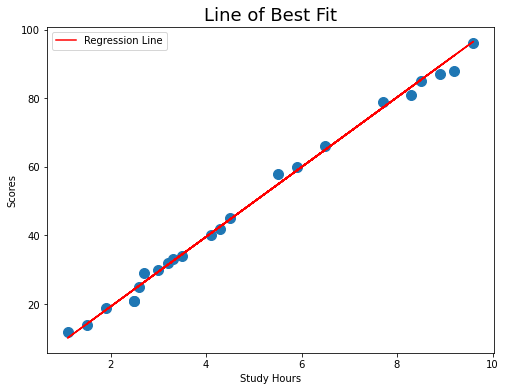

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(X,y,s=100)
plt.plot(X,reg.predict(X),color='red',label='Regression Line')
plt.title('Line of Best Fit',fontsize=18)
plt.xlabel('Study Hours')
plt.ylabel('Scores')
plt.legend()